## Autores:

Luiza Lober de Souza Piva, nUSP: 9302292

Ricardo Camacho Tetti, nUSP: 10728098

In [4]:
#Descomente e execute se esta é a primeira vez rodando este notebook
#!pip install igraph

In [5]:
#Imports
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig

In [6]:
#Silencia os warnings da NetworkX
#--> `FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.`
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Para todas, caso haja algum problema no acesso dos dados, baixe diretamente do seguinte repositório do GitHub https://github.com/luizalober/doc-disciplinas/tree/main/redes-comp-2s2022/data/trab-1

Os caminhos de importação dos arquivos devem ser modificados de acordo. Ex:

`G1= nx.read_pajek("/home/llober/Documentos/cursos/redes-para-computacao-2s2022/centrality_literature.paj")` 

-> `G1= nx.read_pajek("sua-pasta/arquivo-baixado.paj")`

# Q1. Redes escolhidas para este trabalho

## (Acíclica) Centrality literature network

Uma rede descrevendo citações dentro do assunto "centralidade em ciência de redes complexas" dos anos 1948 a 1979.

Descrição do arquivo:

*   129 vértices/nós (publicações);
*   613 conexões/arestas (citações apontando para o artigo citado);
*   Não há loops;
*   Rede com pesos (weighted)
*   Valores das linhas: 
   *  1 - citações simples, 
   *  2 - citações duplas, o que é possível se o artigo citado ou que faz a citação se refere a dois artigos combinados em um único vértice


Rede disponível em [http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm](http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm)

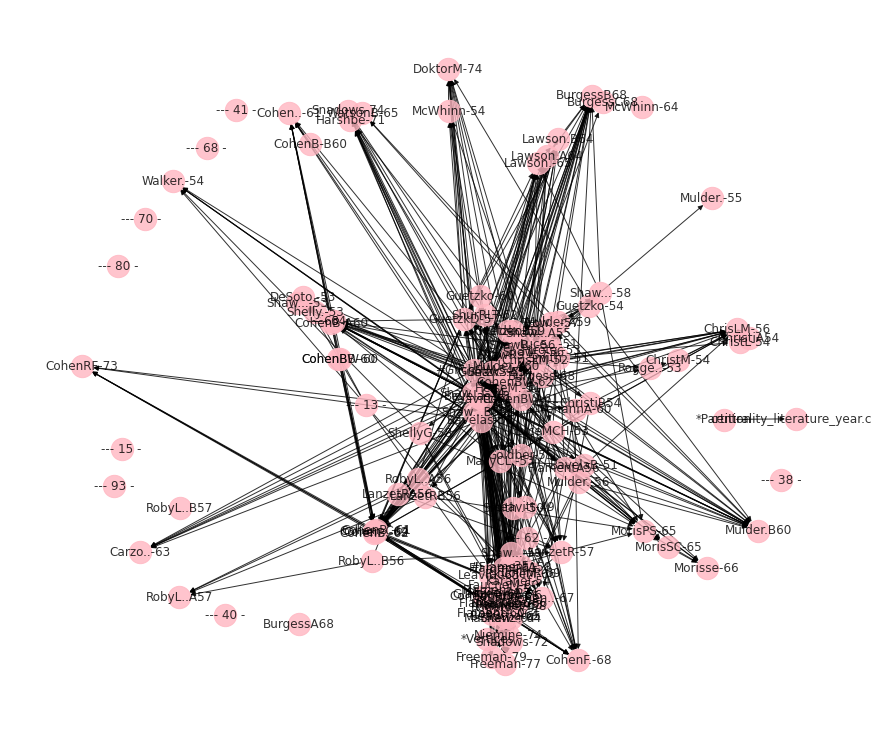

In [7]:
 #Lê a rede
G1= nx.read_pajek("/home/llober/Documentos/cursos/redes-para-computacao-2s2022/centrality_literature.paj")

#Grafica a representação gráfica do grafo G1
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="lightpink", node_size=500, with_labels=True, alpha=0.8)

## Moviegalaxies - Social Networks in Movies - no.777

Rede no. 777 do dataset, representando as interações cena-a-cena dos personagens de Star Wars: Episode V - The Empire Strikes Back

Descrição do arquivo:

*    39 vértices/nós (personagens);
*    225 conexões/arestas (interações na mesma cena);
*    Não há loops;
*    Rede com pesos (weighted), **sem direção**.


Rede disponível em [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3)

Maiores informações (metadata): [https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0](https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/T4HBA3/NGCUG9&version=3.0)


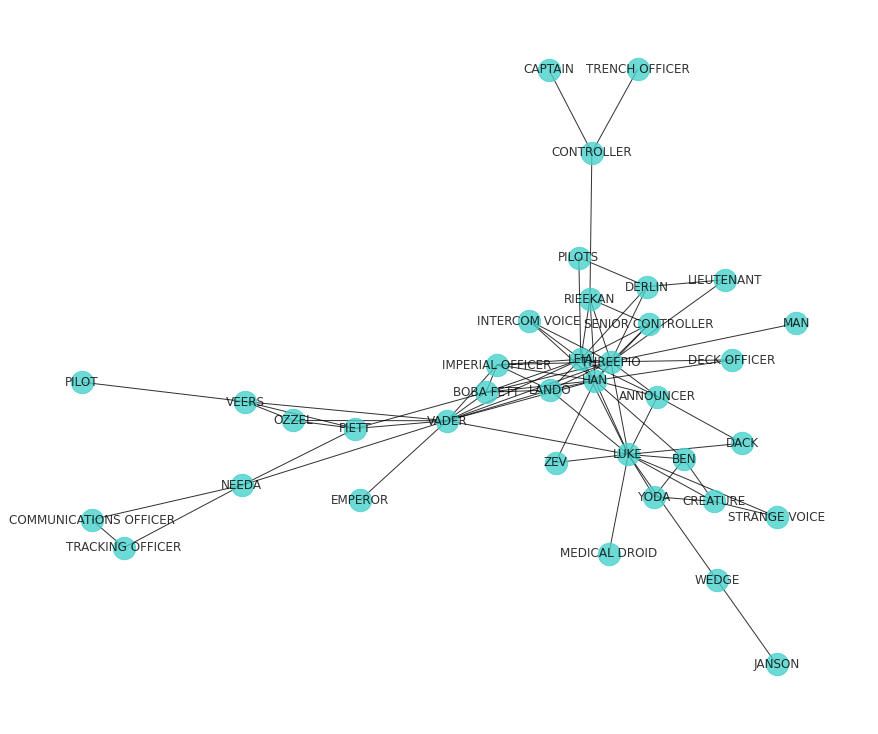

In [8]:
#Lê o arquivo
G2= nx.read_gexf("/home/llober/Documentos/cursos/redes-para-computacao-2s2022/777.gexf", relabel=True) 

#Grafica a representação gráfica do grafo G2
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="mediumturquoise", node_size=500, with_labels=True, alpha=0.8)

## Rede de confiança de médicos

Uma rede que mostra as relações de confiança entre médicos de quatro cidades do meio-oeste dos Estados Unidos. As direções indicam que um dado nó *i* confia ou pede conselhos para um nó *j*.

Descrição do arquivo:

*    241 vértices/nós (médicos);
*    1098 conexões/arestas (confiança);
*    Não há loops;
*    Rede com pesos (weighted), **com direção**.

Rede disponível em https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.moreno_innovation.tar.bz2

Mais informações: http://www.jstor.org/stable/2785979


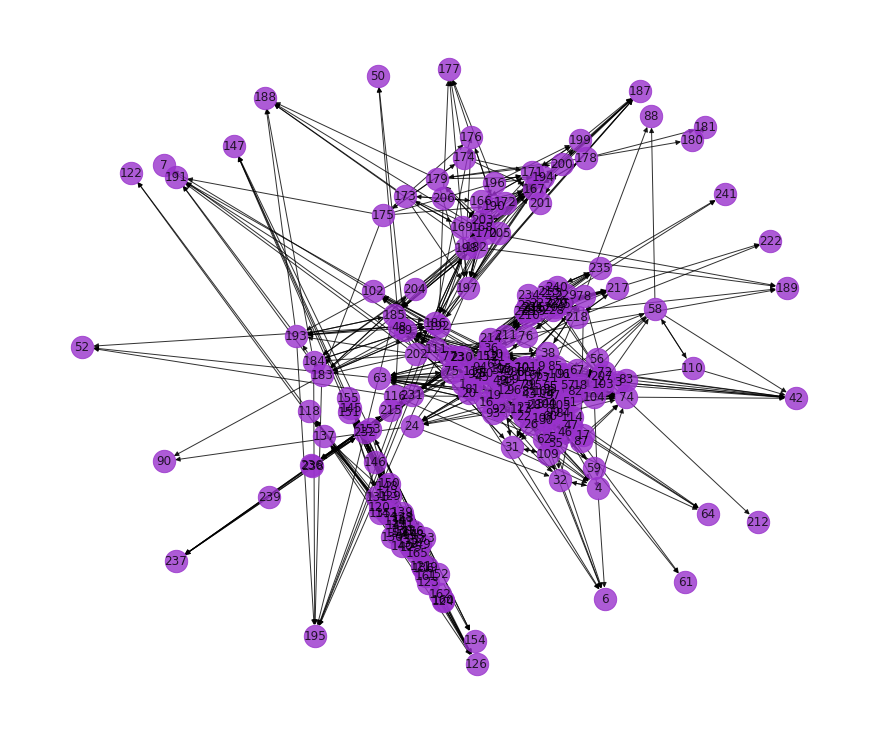

In [9]:
#Lê o grafo
G3= nx.read_edgelist("/home/llober/Documentos/cursos/redes-para-computacao-2s2022/out.moreno_innovation_innovation.txt", create_using=nx.DiGraph())

#Grafica a representação gráfica do grafo G3
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="darkorchid", node_size=500, with_labels=True, alpha=0.8)

# Q2. Matriz de adjacências

Objetivos: 
*   Calcular a matriz de adjacências A (remover pesos caso necessário);
*   Transformar a rede direcionada em não direcionada
*   Calcular $X = A^3$ e $X = A^4$
*   Mostrar quantidade de elementos das matrizes X e Y que possuem
valor não nulo.
*   (Opcional) verifique que o elemento $ij$ da matriz $A^n$ representa o número de caminhos de comprimento n entre os vértices $i$ e $j$.

In [10]:
#Matrizes de adjacência

M1 = nx.adjacency_matrix(G1)
print(M1.todense())

M2 = nx.adjacency_matrix(G2)
print(M2.todense())

M3 = nx.adjacency_matrix(G3)
print(M3.todense())

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
#Transformando em redes não direcionadas
#---> Verificação:
print(nx.is_directed(G1))
print(nx.is_directed(G2))
print(nx.is_directed(G3))
print("---")

#Só é necessário aplicar essa operação para a rede de citações
G1_u = nx.to_undirected(G1)
M1_u = nx.adjacency_matrix(G1_u)
print("Convertendo G1 para rede sem direção:")
print(M1_u.todense())

True
False
True
---
Convertendo G1 para rede sem direção:
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
#Calculo de A³ (X1)

X1_1 = (M1_u)*(M1_u)*(M1_u)
X1_2 = (M2)*(M2)*(M2)
X1_3 = (M3)*(M3)*(M3)

#prints
print("Graph 1:")
print(X1_1.todense())

print("Graph 2:")
print(X1_2.todense())

print("Graph 3:")
print(X1_3.todense())

Graph 1:
[[212.  44.  18. ...   0.   0.   7.]
 [ 44.   4.   9. ...   0.   0.   2.]
 [ 18.   9.   2. ...   0.   0.   1.]
 ...
 [  0.   0.   0. ...   0.   1.   0.]
 [  0.   0.   0. ...   1.   0.   0.]
 [  7.   2.   1. ...   0.   0.   0.]]
Graph 2:
[[440. 113. 289. ...  12.  54.  95.]
 [113.  38.  73. ...   9.  48.  15.]
 [289.  73. 214. ...  11.  45.  62.]
 ...
 [ 12.   9.  11. ...   0.   4.   3.]
 [ 54.  48.  45. ...   4.  34.  17.]
 [ 95.  15.  62. ...   3.  17.   6.]]
Graph 3:
[[0 2 4 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 3 1]
 [0 0 0 ... 0 0 0]]


In [13]:
#Calculo de A⁴ (X2)

X2_1 = X1_1*(M1_u)
X2_2 = X1_2*(M2)
X2_3 = X1_3*(M3)

#prints
print("Graph 1:")
print(X2_1.todense())

print("Graph 2:")
print(X2_2.todense())

print("Graph 3:")
print(X2_3.todense())

Graph 1:
[[6.132e+03 4.200e+02 4.800e+02 ... 0.000e+00 0.000e+00 1.790e+02]
 [4.200e+02 9.900e+01 5.800e+01 ... 0.000e+00 0.000e+00 3.900e+01]
 [4.800e+02 5.800e+01 8.500e+01 ... 0.000e+00 0.000e+00 3.700e+01]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.790e+02 3.900e+01 3.700e+01 ... 0.000e+00 0.000e+00 3.000e+01]]
Graph 2:
[[16888.  3890. 11032. ...   475.  2042.  3329.]
 [ 3890.  1376.  2595. ...   162.   715.  1131.]
 [11032.  2595.  7496. ...   292.  1264.  2235.]
 ...
 [  475.   162.   292. ...    52.   216.   101.]
 [ 2042.   715.  1264. ...   216.   936.   429.]
 [ 3329.  1131.  2235. ...   101.   429.  1000.]]
Graph 3:
[[ 0  0 11 ...  0  0  0]
 [ 1  4  7 ...  0  0  0]
 [ 0  6 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  1]
 [ 0  0  0 ...  0 16  5]
 [ 0  0  0 ...  0  0  0]]


In [14]:
#Entradas não-nulas

n_g1 = np.count_nonzero(G1)
n_g2 = np.count_nonzero(G2)
n_g3 = np.count_nonzero(G3)

#Para as multiplicações
n_x1_1 = np.count_nonzero(X1_1.todense())
n_x1_2 = np.count_nonzero(X1_2.todense())
n_x1_3 = np.count_nonzero(X1_3.todense())

n_x2_1 = np.count_nonzero(X2_1.todense())
n_x2_2 = np.count_nonzero(X2_2.todense())
n_x2_3 = np.count_nonzero(X2_3.todense())

#Prints
print("Não nulos para G1:", n_g1)
print("Não nulos para G2:", n_g2)
print("Não nulos para G3:", n_g3)

print("---")

print("Não nulos, A³ em G1-unidirecionado:", n_x1_1)
print("Não nulos, A³ em G2:", n_x1_2)
print("Não nulos, A³ em G3:", n_x1_3)

print("---")

print("Não nulos, A⁴ em G1-unidirecionado:", n_x2_1)
print("Não nulos, A⁴ em G2:", n_x2_2)
print("Não nulos, A⁴ em G3:", n_x2_3)

Não nulos para G1: 132
Não nulos para G2: 37
Não nulos para G3: 241
---
Não nulos, A³ em G1-unidirecionado: 13280
Não nulos, A³ em G2: 1062
Não nulos, A³ em G3: 8190
---
Não nulos, A⁴ em G1-unidirecionado: 14163
Não nulos, A⁴ em G2: 1287
Não nulos, A⁴ em G3: 12174


# Q3. Co-citação e acoplamento bibliográfico

Objetivos:

*    Calcular a matriz que representa a similaridade por co-citação e acoplamento bibliográfico;
*    Mostrar qual é o vértice com maior valor de força.

As definições que usaremos para os cálculos são:


*   **Co-citação**: $C = A \cdot A^{T} $

*   **Acoplamento bibliográfico**: $B = A^{T} \cdot A$

onde tanto $C$ quanto $B$ são matrizes simétricas

In [15]:
#Calculo da matriz de co-citação

C1 = M1_u @ np.transpose(M1_u)
C2 = M2 @ np.transpose(M2)
C3 = M3 @ np.transpose(M3)

#prints
print("Co-citação do grafo 1:")
print(C1.todense(), '\n')

print("Co-citação do grafo 2:")
print(C2.todense(), '\n')

print("Co-citação do grafo 3:")
print(C3.todense())

Co-citação do grafo 1:
[[32.  1.  3. ...  0.  0.  1.]
 [ 1.  4.  1. ...  0.  0.  1.]
 [ 3.  1.  3. ...  0.  0.  1.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 1.  1.  1. ...  0.  0.  1.]] 

Co-citação do grafo 2:
[[14.  4.  6. ...  1.  4.  3.]
 [ 4.  7.  1. ...  2.  9.  3.]
 [ 6.  1. 13. ...  0.  0.  1.]
 ...
 [ 1.  2.  0. ...  2.  4.  1.]
 [ 4.  9.  0. ...  4. 18.  4.]
 [ 3.  3.  1. ...  1.  4.  2.]] 

Co-citação do grafo 3:
[[6 0 0 ... 0 0 0]
 [0 6 3 ... 0 0 0]
 [0 3 6 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]]


In [16]:
#Calculo da matriz de acoplamento bibliográfico

B1 = np.transpose(M1_u) @ M1_u
B2 = np.transpose(M2) @ M2
B3 = np.transpose(M3) @ M3

#prints
print("Matriz de acoplamento bibliográfico do grafo 1:")
print(B1.todense(), '\n')

print("Matriz de acoplamento bibliográfico do grafo 2:")
print(B2.todense(), '\n')

print("Matriz de acoplamento bibliográfico do grafo 3:")
print(B3.todense())

Matriz de acoplamento bibliográfico do grafo 1:
[[32.  1.  3. ...  0.  0.  1.]
 [ 1.  4.  1. ...  0.  0.  1.]
 [ 3.  1.  3. ...  0.  0.  1.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 1.  1.  1. ...  0.  0.  1.]] 

Matriz de acoplamento bibliográfico do grafo 2:
[[14.  4.  6. ...  1.  4.  3.]
 [ 4.  7.  1. ...  2.  9.  3.]
 [ 6.  1. 13. ...  0.  0.  1.]
 ...
 [ 1.  2.  0. ...  2.  4.  1.]
 [ 4.  9.  0. ...  4. 18.  4.]
 [ 3.  3.  1. ...  1.  4.  2.]] 

Matriz de acoplamento bibliográfico do grafo 3:
[[1 0 0 ... 0 0 0]
 [0 3 1 ... 0 0 0]
 [0 1 5 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 1]
 [0 0 0 ... 0 1 2]]


In [17]:
# Vértice com maior força

#Para este cálculo, utilizamos a biblioteca iGraph
G1_igraph = ig.Graph.Adjacency((nx.to_numpy_matrix(G1) > 0).tolist())
G2_igraph = ig.Graph.Adjacency((nx.to_numpy_matrix(G2) > 0).tolist())
G3_igraph = ig.Graph.Adjacency((nx.to_numpy_matrix(G3) > 0).tolist())

G1_strength = G1_igraph.strength()
G2_strength = G2_igraph.strength()
G3_strength = G3_igraph.strength()

print("Vértice com maior força do grafo 1:", G1_strength.index(max(G1_strength)), '\n')
print("Vértice com maior força do grafo 2:", G2_strength.index(max(G2_strength)), '\n')
print("Vértice com maior força do grafo 3:", G3_strength.index(max(G3_strength)))

Vértice com maior força do grafo 1: 5 

Vértice com maior força do grafo 2: 29 

Vértice com maior força do grafo 3: 126


# Q4. Na rede acíclica, verifique se existem ciclos.

Essa questão é bem simples ao se empregar a função `nx.find_cycle` do pacote NetworkX

In [18]:
#Grafo 1: única rede acíclica

nx.find_cycle(G1)

NetworkXNoCycle: ignored

De fato, a rede é acíclica. Para as outras redes,

In [19]:
print("Grafo dos filmes (G2):", nx.find_cycle(G2))

print("Grafo da rede de médicos (G3):", nx.find_cycle(G3))

Grafo dos filmes (G2): [('ANNOUNCER', 'DACK'), ('DACK', 'LUKE'), ('LUKE', 'ANNOUNCER')]
Grafo da rede de médicos (G3): [('13', '14'), ('14', '15'), ('15', '13')]


# Q5. Reciprocidade

**Objetivo: Considere uma das definições da medida de reciprocidade definida em
[Reciprocity (network science)](https://en.wikipedia.org/wiki/Reciprocity_(network_science)).**

**Nas redes com ciclos, calcule o valor da reciprocidade. Compare estes valores, mencionando possíveis razões para uma rede ser mais recíproca que a outra.**

Os algorítmos que podemos empregar aqui, utilizando o pacote NetworkX, são `nx.reciprocity(G[, nodes])` e `overall_reciprocity(G)`:

*   No primeiro caso, o algorítmo aplica $$r = |{(u,v) \in G|(v,u) \in G}| / |{(u,v) \in G}|,$$
que é a razão do número de vértices apontando para ambas direções para o número total de vértices no grafo. Esse algorítmo permite calcular a reciprocidade por nós;
*   No segundo, a mesma definição é válida, mas ele por padrão calcula a reciprocidade para todo o grafo (que também é o padrão de `nx.reciprocity()`).

Como queremos uma comparação geral, vamos adotar `nx.reciprocity()` para ambos grafos.


In [20]:
#Rede dos filmes (G2):
print(nx.reciprocity(G2))

0.0


In [21]:
#Rede de médicos (G3):

print(nx.reciprocity(G3))

0.31876138433515483
